<a href="https://colab.research.google.com/github/IGPTsewwandi/Image-Processing-Based-Smart-Waste-Management-System-/blob/feature%2Fclassification/Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
# Load the trained model
from tensorflow.keras.models import load_model
import cv2
import numpy as np

# Load the trained model
model_path = "/content/drive/MyDrive/waste_outputs/waste_classifier_model.h5"
model = load_model(model_path)

# Labels (same order as training)
class_labels = ['plastic', 'glass', 'paper', 'metal', 'organic']


Saving metal2.jpg to metal2.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
Detected: metal (20.30%)


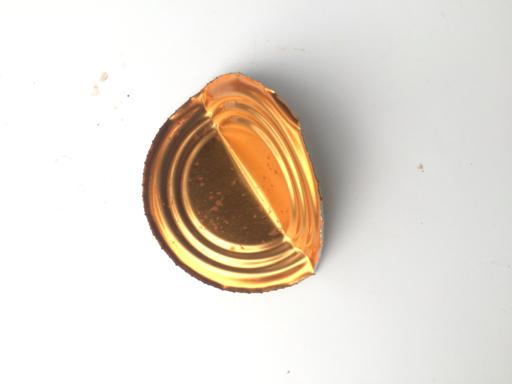

In [9]:
# Detect Waste Item in a Single Uploaded Image
from google.colab import files
from google.colab.patches import cv2_imshow
import cv2
import numpy as np

# Upload file
uploaded = files.upload()

for fn in uploaded.keys():
    # Load image with OpenCV
    img = cv2.imread(fn)
    img_resized = cv2.resize(img, (128,128))
    img_array = img_resized.astype("float32")/255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Prediction
    pred = model.predict(img_array)
    class_id = np.argmax(pred)
    label = class_labels[class_id]
    confidence = np.max(pred) * 100

    print(f"Detected: {label} ({confidence:.2f}%)")

    # Show image in Colab
    cv2_imshow(img)
